In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\USER\Downloads\train.csv.zip")

In [3]:
df

id    qid1    qid2  \
0            0       1       2   
1            1       3       4   
2            2       5       6   
3            3       7       8   
4            4       9      10   
...        ...     ...     ...   
404285  404285  433578  379845   
404286  404286   18840  155606   
404287  404287  537928  537929   
404288  404288  537930  537931   
404289  404289  537932  537933   

                                                question1  \
0       What is the step by step guide to invest in sh...   
1       What is the story of Kohinoor (Koh-i-Noor) Dia...   
2       How can I increase the speed of my internet co...   
3       Why am I mentally very lonely? How can I solve...   
4       Which one dissolve in water quikly sugar, salt...   
...                                                   ...   
404285  How many keywords are there in the Racket prog...   
404286          Do you believe there is life after death?   
404287                                  What is one coin?   
404288  What is the approx annual cost of living while...   
404289              What is like to have sex with cousin?   

                                                question2  is_duplicate  
0       What is the step by step guide to invest in sh...             0  
1       What would happen if the Indian government sto...             0  
2       How can Internet speed be increased by hacking...             0  
3       Find the remainder when [math]23^{24}[/math] i...             0  
4                 Which fish would survive in salt water?             0  
...                                                   ...           ...  
404285  How many keywords are there in PERL Programmin...             0  
404286         Is it true that there is life after death?             1  
404287                                  What's this coin?             0  
404288  I am having little hairfall problem but I want...             0  
404289      What is it like to have sex with your cousin?             0  

[404290 rows x 6 columns]

In [4]:
df.shape

(404290, 6)

In [5]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.sample(10)

id    qid1    qid2  \
114331  114331  115277   81294   
341699  341699  469579  469580   
376531  376531  232201   62920   
125155  125155  201958   37384   
133482  133482  213523  213524   
69805    69805  120406  120407   
225191  225191  333479  333480   
97924    97924  162819  162820   
338775  338775   63680  235383   
288772  288772  409785  409786   

                                                question1  \
114331                 What are the best movies for kids?   
341699                      Which is your favourite book?   
376531  Can you still get pregnant one day before mens...   
125155  Will it show me if someone has seen their mess...   
133482  What is the best non-commercial Monopoly variant?   
69805              How do half sizes work with UGG boots?   
225191                     How do I get my car into uber?   
97924   Can very strong sciatic and/or knee pain stop ...   
338775  How can I tell if someone has blocked my messa...   
288772  Between Mao Zedong and Deng Xiaoping, whom do ...   

                                                question2  is_duplicate  
114331    What are the best movies for children to watch?             1  
341699              Which is your favourite book and why?             1  
376531  Can you get pregnant 2 days before your period...             1  
125155                   How do I block someone on Quora?             0  
133482                      What is a chartered monopoly?             0  
69805   Do you buy boots that are half a size up from ...             0  
225191                    How can I start my car in uber?             1  
97924   What causes a shooting pain from the knee to t...             0  
338775  How can I tell if someone deleted my message w...             0  
288772     How was the relationship between Mao and Deng?             0

In [10]:
df['question1'][2]

'How can I increase the speed of my internet connection while using a VPN?'

In [11]:
df['question2'][2]

'How can Internet speed be increased by hacking through DNS?'

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<AxesSubplot:>

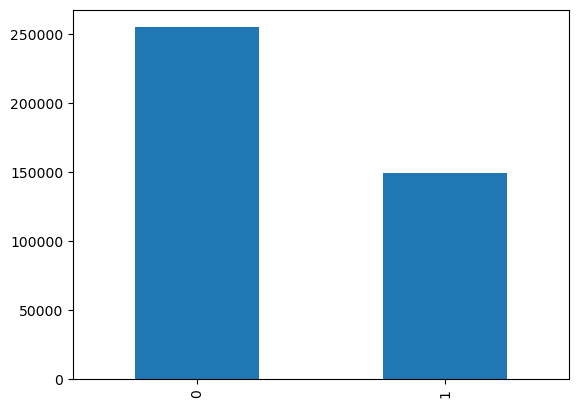

In [12]:
# Distribution of duplicate and non-duplicate questions
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [13]:
## Repeated Questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('The number of unique questions',np.unique(qid).shape[0])
x=qid.value_counts() > 1
print('Number of Questions getting repeated',x[x].shape[0])

The number of unique questions 537933
Number of Questions getting repeated 111780


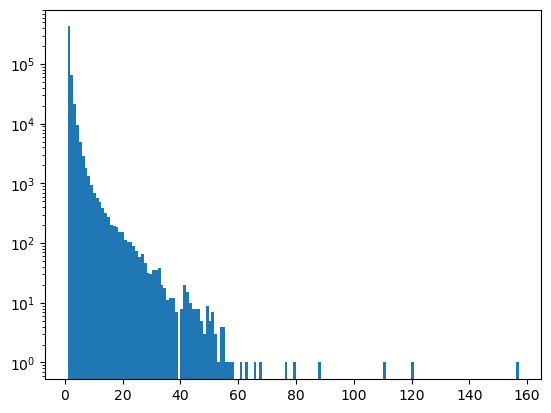

In [14]:
#Repeated question hisogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [15]:
new_df = df.sample(20000)

In [16]:
new_df.shape

(20000, 6)

In [17]:
ques_df = new_df[['question1','question2']]

In [18]:
ques_df

question1  \
104969  Can instagram accounts see who visited their p...   
249569  How would I dress like it's the year 1990 if I...   
81157              How can I improve my English Language?   
273329  Is it polite to ask a person's gender if you h...   
60304               How do I lose weight in a short time?   
...                                                   ...   
167943                How can I promote my gig on Fiverr?   
259277               Which is the best novel on politics?   
159687         Which laptop is should I buy around 50000?   
200652              What is the molecular shape of BrO2-?   
54226          Who and where were we before we were born?   

                                                question2  
104969     How can I know who views my Instagram profile?  
249569  How do I dress like it's the year 1990 if I'm ...  
81157   How do I improve my overall native English lan...  
273329           Which electrical code is used in Europe?  
60304   What is the fastest way to lose weight success...  
...                                                   ...  
167943      How could I boost up my gigs order on fiverr?  
259277                          Which are the best novel?  
159687  I want to buy a new laptop. My requirement is ...  
200652  What is the molecular shape of CFCl2 and why i...  
54226                  Where were we before we were born?  

[20000 rows x 2 columns]

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cv = CountVectorizer(max_features=3000)

In [21]:
questions = list(ques_df['question1']) + list(ques_df['question2'])

In [22]:
q1_arr , q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [23]:
temp_df1 =  pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index = ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(20000, 6000)

In [24]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [25]:
temp_df

0  1  2  3  4  5  6  7  8  9  ...  2991  2992  2993  2994  2995  2996  \
104969  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
249569  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
81157   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
273329  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
60304   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
...    .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
167943  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
259277  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
159687  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
200652  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
54226   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

        2997  2998  2999  is_duplicate  
104969     0     0     0             1  
249569     0     0     0             1  
81157      0     0     0             1  
273329     0     0     0             0  
60304      0     0     0             1  
...      ...   ...   ...           ...  
167943     0     0     0             0  
259277     0     0     0             0  
159687     0     0     0             0  
200652     0     0     0             0  
54226      0     0     0             0  

[20000 rows x 6001 columns]

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=42)

In [27]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
X_train.shape

(16000, 6000)

In [29]:
X_test.shape

(4000, 6000)

In [30]:
y_train.shape

(16000,)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.73475
[[2339  201]
 [ 860  600]]


In [33]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [34]:
from xgboost import XGBClassifier

In [35]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.72375
[[2261  279]
 [ 826  634]]


In [36]:
# creating features

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv(r"C:\Users\USER\Downloads\train.csv.zip")

In [39]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [40]:
df.shape

(404290, 6)

In [41]:
new_df = df.sample(20000,random_state=42)

In [42]:
new_df.head()

id    qid1    qid2  \
8067      8067   15738   15739   
368101  368101   12736  104117   
70497    70497  121486  121487   
226567  226567  254474  258192   
73186    73186   48103    3062   

                                                question1  \
8067                   How do I play Pokémon GO in Korea?   
368101  What are some of the best side dishes for crab...   
70497   Which is more advisable and better material fo...   
226567       How do I improve logical programming skills?   
73186              How close we are to see 3rd world war?   

                                                question2  is_duplicate  
8067                   How do I play Pokémon GO in China?             0  
368101  What are some good side dishes for buffalo chi...             0  
70497       What is the best server setup for buddypress?             0  
226567  How can I improve my logical skills for progra...             1  
73186                       How close is a World War III?             1

In [43]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

0    12606
1     7394
Name: is_duplicate, dtype: int64
0    63.03
1    36.97
Name: is_duplicate, dtype: float64


<AxesSubplot:>

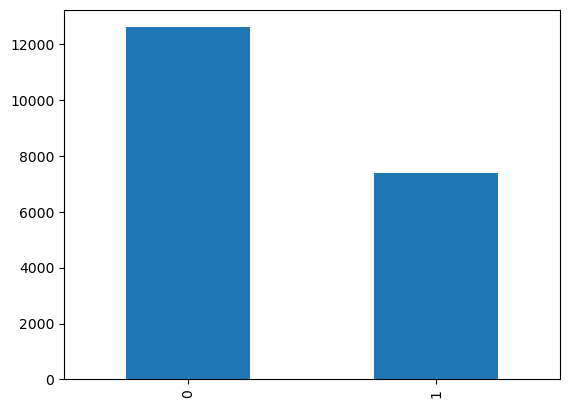

In [44]:
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count()*100))
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [45]:
## Repeated Questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('The number of unique questions',np.unique(qid).shape[0])
x=qid.value_counts() > 1
print('Number of Questions getting repeated',x[x].shape[0])

The number of unique questions 37753
Number of Questions getting repeated 1780


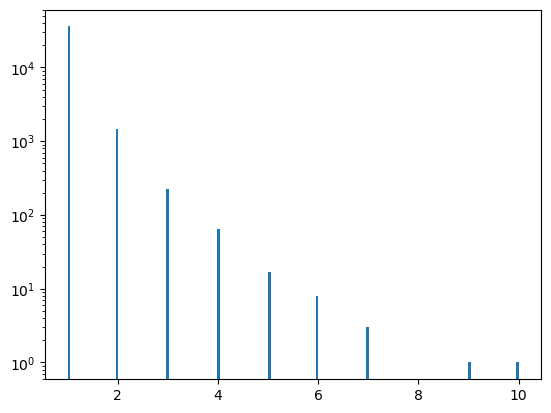

In [46]:
#Repeated question hisogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [47]:
## Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [48]:
new_df.head()

id    qid1    qid2  \
8067      8067   15738   15739   
368101  368101   12736  104117   
70497    70497  121486  121487   
226567  226567  254474  258192   
73186    73186   48103    3062   

                                                question1  \
8067                   How do I play Pokémon GO in Korea?   
368101  What are some of the best side dishes for crab...   
70497   Which is more advisable and better material fo...   
226567       How do I improve logical programming skills?   
73186              How close we are to see 3rd world war?   

                                                question2  is_duplicate  \
8067                   How do I play Pokémon GO in China?             0   
368101  What are some good side dishes for buffalo chi...             0   
70497       What is the best server setup for buddypress?             0   
226567  How can I improve my logical skills for progra...             1   
73186                       How close is a World War III?             1   

        q1_len  q2_len  
8067        34      34  
368101      53      51  
70497       96      45  
226567      44      52  
73186       38      29

In [49]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row:len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row:len(row.split(" ")))

In [50]:
new_df.head(2)

id   qid1    qid2  \
8067      8067  15738   15739   
368101  368101  12736  104117   

                                                question1  \
8067                   How do I play Pokémon GO in Korea?   
368101  What are some of the best side dishes for crab...   

                                                question2  is_duplicate  \
8067                   How do I play Pokémon GO in China?             0   
368101  What are some good side dishes for buffalo chi...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  
8067        34      34             8             8  
368101      53      51            11             9

In [51]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [52]:
new_df['word_common'] = new_df.apply(common_words,axis = 1)

In [53]:
new_df.head()

id    qid1    qid2  \
8067      8067   15738   15739   
368101  368101   12736  104117   
70497    70497  121486  121487   
226567  226567  254474  258192   
73186    73186   48103    3062   

                                                question1  \
8067                   How do I play Pokémon GO in Korea?   
368101  What are some of the best side dishes for crab...   
70497   Which is more advisable and better material fo...   
226567       How do I improve logical programming skills?   
73186              How close we are to see 3rd world war?   

                                                question2  is_duplicate  \
8067                   How do I play Pokémon GO in China?             0   
368101  What are some good side dishes for buffalo chi...             0   
70497       What is the best server setup for buddypress?             0   
226567  How can I improve my logical skills for progra...             1   
73186                       How close is a World War III?             1   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  
8067        34      34             8             8            7  
368101      53      51            11             9            6  
70497       96      45            16             8            2  
226567      44      52             7             9            4  
73186       38      29             9             7            3

In [54]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [55]:
new_df['word_total'] = new_df.apply(total_words,axis=1)

In [56]:
new_df.head(2)

id   qid1    qid2  \
8067      8067  15738   15739   
368101  368101  12736  104117   

                                                question1  \
8067                   How do I play Pokémon GO in Korea?   
368101  What are some of the best side dishes for crab...   

                                                question2  is_duplicate  \
8067                   How do I play Pokémon GO in China?             0   
368101  What are some good side dishes for buffalo chi...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  
8067        34      34             8             8            7          16  
368101      53      51            11             9            6          20

In [57]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)

In [58]:
new_df.head()

id    qid1    qid2  \
8067      8067   15738   15739   
368101  368101   12736  104117   
70497    70497  121486  121487   
226567  226567  254474  258192   
73186    73186   48103    3062   

                                                question1  \
8067                   How do I play Pokémon GO in Korea?   
368101  What are some of the best side dishes for crab...   
70497   Which is more advisable and better material fo...   
226567       How do I improve logical programming skills?   
73186              How close we are to see 3rd world war?   

                                                question2  is_duplicate  \
8067                   How do I play Pokémon GO in China?             0   
368101  What are some good side dishes for buffalo chi...             0   
70497       What is the best server setup for buddypress?             0   
226567  How can I improve my logical skills for progra...             1   
73186                       How close is a World War III?             1   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
8067        34      34             8             8            7          16   
368101      53      51            11             9            6          20   
70497       96      45            16             8            2          24   
226567      44      52             7             9            4          16   
73186       38      29             9             7            3          16   

        word_share  
8067          0.44  
368101        0.30  
70497         0.08  
226567        0.25  
73186         0.19

minimun characters :  1
maximun characters :  334
average num of characters :  59


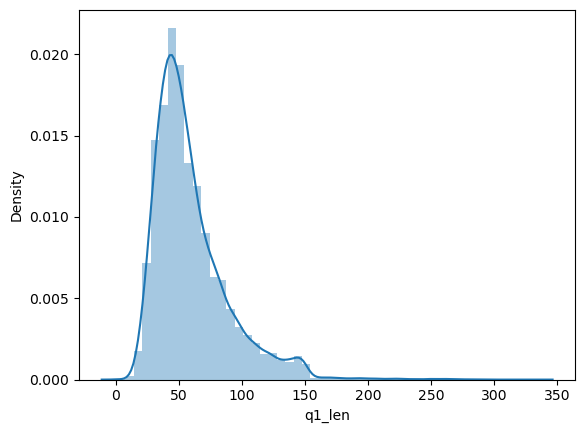

In [59]:
#  analysis of features
sns.distplot(new_df['q1_len'])
print("minimun characters : ",new_df['q1_len'].min())
print("maximun characters : ",new_df['q1_len'].max())
print("average num of characters : ",int(new_df['q1_len'].mean()))

minimun characters :  1
maximun characters :  1169
average num of characters :  59


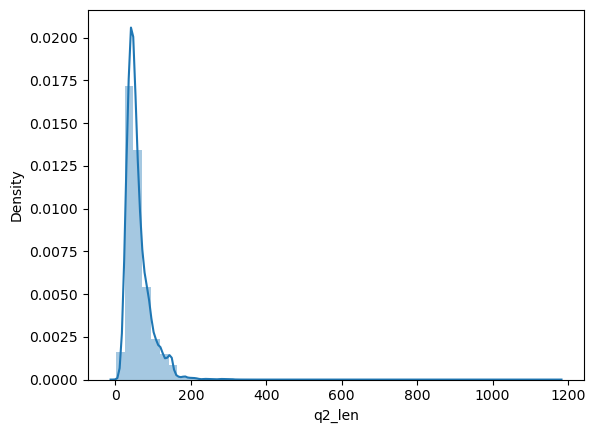

In [60]:
sns.distplot(new_df['q2_len'])
print("minimun characters : ",new_df['q2_len'].min())
print("maximun characters : ",new_df['q2_len'].max())
print("average num of characters : ",int(new_df['q2_len'].mean()))

In [61]:
new_df.head(2)

id   qid1    qid2  \
8067      8067  15738   15739   
368101  368101  12736  104117   

                                                question1  \
8067                   How do I play Pokémon GO in Korea?   
368101  What are some of the best side dishes for crab...   

                                                question2  is_duplicate  \
8067                   How do I play Pokémon GO in China?             0   
368101  What are some good side dishes for buffalo chi...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
8067        34      34             8             8            7          16   
368101      53      51            11             9            6          20   

        word_share  
8067          0.44  
368101        0.30

minimun characters :  1
maximun characters :  67
average num of characters :  10


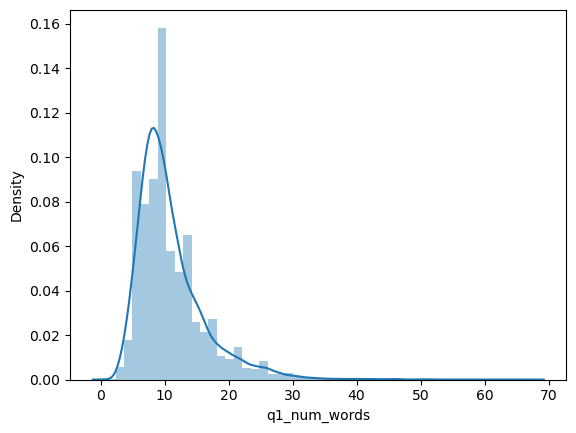

In [62]:
sns.distplot(new_df['q1_num_words'])
print("minimun characters : ",new_df['q1_num_words'].min())
print("maximun characters : ",new_df['q1_num_words'].max())
print("average num of characters : ",int(new_df['q1_num_words'].mean()))

minimun characters :  1
maximun characters :  228
average num of characters :  11


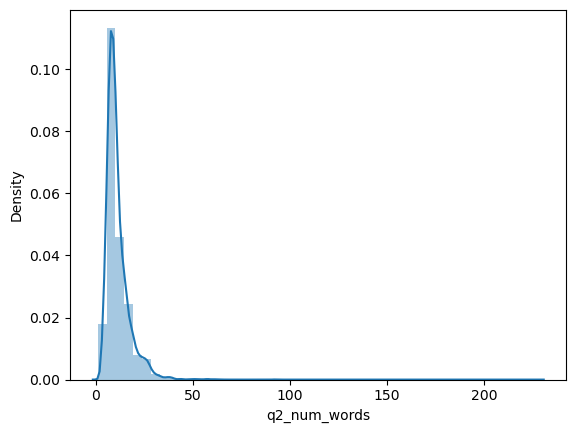

In [63]:
sns.distplot(new_df['q2_num_words'])
print("minimun characters : ",new_df['q2_num_words'].min())
print("maximun characters : ",new_df['q2_num_words'].max())
print("average num of characters : ",int(new_df['q2_num_words'].mean()))

In [64]:
new_df.head(1)

id   qid1   qid2                           question1  \
8067  8067  15738  15739  How do I play Pokémon GO in Korea?   

                               question2  is_duplicate  q1_len  q2_len  \
8067  How do I play Pokémon GO in China?             0      34      34   

      q1_num_words  q2_num_words  word_common  word_total  word_share  
8067             8             8            7          16        0.44

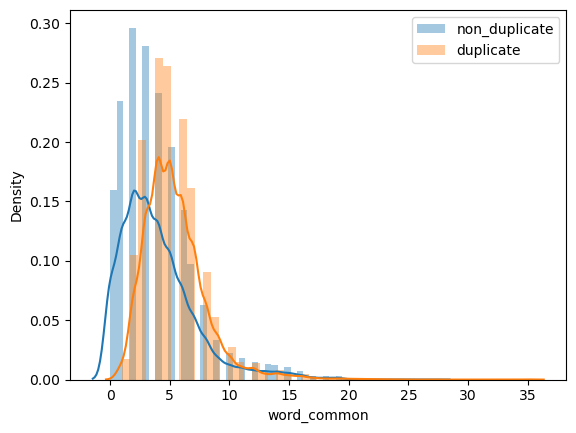

In [65]:
 # common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label = 'non_duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label = 'duplicate')
plt.legend()
plt.show()

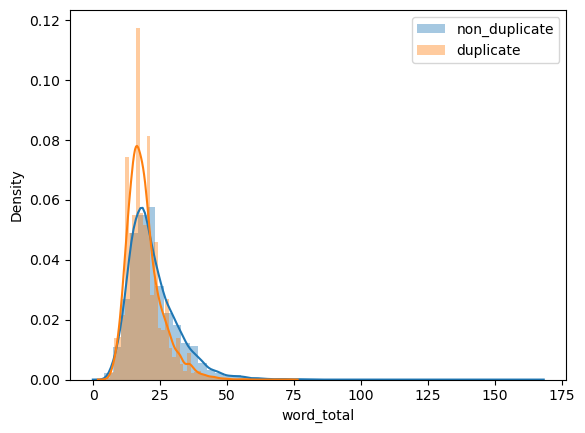

In [66]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label = 'non_duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label = 'duplicate')
plt.legend()
plt.show()

In [67]:
ques_df = new_df[['question1','question2']]
ques_df.head(4)

question1  \
8067                   How do I play Pokémon GO in Korea?   
368101  What are some of the best side dishes for crab...   
70497   Which is more advisable and better material fo...   
226567       How do I improve logical programming skills?   

                                                question2  
8067                   How do I play Pokémon GO in China?  
368101  What are some good side dishes for buffalo chi...  
70497       What is the best server setup for buddypress?  
226567  How can I improve my logical skills for progra...

In [68]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head(4)

(20000, 8)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
8067               0      34      34             8             8            7   
368101             0      53      51            11             9            6   
70497              0      96      45            16             8            2   
226567             1      44      52             7             9            4   

        word_total  word_share  
8067            16        0.44  
368101          20        0.30  
70497           24        0.08  
226567          16        0.25

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(ques_df['question1']) + list(ques_df['question2'])

cv =CountVectorizer(max_features=3000)
q1_arr ,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [70]:
temp_df1 = pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index = ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
print(temp_df.shape)
temp_df

(20000, 6000)


0     1     2     3     4     5     6     7     8     9     ...  2990  \
8067       0     0     0     0     0     0     0     0     0     0  ...     0   
368101     0     0     0     0     0     0     0     0     0     0  ...     0   
70497      0     0     0     0     0     0     0     0     0     0  ...     0   
226567     0     0     0     0     0     0     0     0     0     0  ...     0   
73186      0     0     0     0     0     0     0     0     0     0  ...     0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
321495     0     0     0     0     0     0     0     0     0     0  ...     0   
122594     0     0     0     0     0     0     0     0     0     0  ...     0   
360359     0     0     0     0     0     0     0     0     0     0  ...     0   
280696     0     0     0     0     0     0     0     0     0     0  ...     0   
110146     0     0     0     0     0     0     0     0     0     0  ...     0   

        2991  2992  2993  2994  2995  2996  2997  2998  2999  
8067       0     0     0     0     0     0     0     0     0  
368101     0     0     0     0     0     0     0     0     0  
70497      0     0     0     0     0     0     0     0     0  
226567     0     0     0     0     0     0     0     0     0  
73186      0     0     0     0     0     0     0     0     0  
...      ...   ...   ...   ...   ...   ...   ...   ...   ...  
321495     0     0     0     0     0     0     0     0     0  
122594     0     0     0     1     0     0     0     0     0  
360359     0     0     0     0     0     0     0     0     0  
280696     0     0     0     0     0     0     0     0     0  
110146     0     0     0     0     0     0     0     0     0  

[20000 rows x 6000 columns]

In [71]:
final_df = pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df

(20000, 6008)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
8067               0      34      34             8             8            7   
368101             0      53      51            11             9            6   
70497              0      96      45            16             8            2   
226567             1      44      52             7             9            4   
73186              1      38      29             9             7            3   
...              ...     ...     ...           ...           ...          ...   
321495             1      45      51             9             9            7   
122594             1      43      49             9            10            2   
360359             0      24      32             4             6            2   
280696             0      55      43            11             7            0   
110146             0      36      32             7             6            3   

        word_total  word_share  0  1  ...  2990  2991  2992  2993  2994  2995  \
8067            16        0.44  0  0  ...     0     0     0     0     0     0   
368101          20        0.30  0  0  ...     0     0     0     0     0     0   
70497           24        0.08  0  0  ...     0     0     0     0     0     0   
226567          16        0.25  0  0  ...     0     0     0     0     0     0   
73186           16        0.19  0  0  ...     0     0     0     0     0     0   
...            ...         ... .. ..  ...   ...   ...   ...   ...   ...   ...   
321495          18        0.39  0  0  ...     0     0     0     0     0     0   
122594          19        0.11  0  0  ...     0     0     0     0     1     0   
360359          10        0.20  0  0  ...     0     0     0     0     0     0   
280696          18        0.00  0  0  ...     0     0     0     0     0     0   
110146          13        0.23  0  0  ...     0     0     0     0     0     0   

        2996  2997  2998  2999  
8067       0     0     0     0  
368101     0     0     0     0  
70497      0     0     0     0  
226567     0     0     0     0  
73186      0     0     0     0  
...      ...   ...   ...   ...  
321495     0     0     0     0  
122594     0     0     0     0  
360359     0     0     0     0  
280696     0     0     0     0  
110146     0     0     0     0  

[20000 rows x 6008 columns]

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=42)

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)
confusion_matrix(y_test,y_pred)

76.44999999999999


array([[2225,  271],
       [ 671,  833]], dtype=int64)

In [74]:
from xgboost import XGBClassifier
xbg = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)
confusion_matrix(y_test,y_pred)

76.25


array([[2068,  428],
       [ 522,  982]], dtype=int64)

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os 
from bs4 import BeautifulSoup

import re
import warnings 
warnings.filterwarnings('ignore')

In [76]:
df  = pd.read_csv(r"C:\Users\USER\Downloads\train.csv.zip")

In [77]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [78]:
new_df = df.sample(30000,random_state = 2)

In [79]:
new_df.head(5)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  What is the best marketing automation tool for...   
115086  I am poor but I want to invest. What should I do?   
327711  I am from India and live abroad. I met a guy f...   
367788  Why do so many people in the U.S. hate the sou...   
151235                Consequences of Bhopal gas tragedy?   

                                                question2  is_duplicate  
398782  What is the best marketing automation tool for...             1  
115086  I am quite poor and I want to be very rich. Wh...             0  
327711  T.I.E.T to Thapar University to Thapar Univers...             0  
367788  My boyfriend doesnt feel guilty when he hurts ...             0  
151235  What was the reason behind the Bhopal gas trag...             0

In [80]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [81]:
 preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [82]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [83]:
new_df['question1'][398782]

'what is the best marketing automation tool for small and mid size companies'

In [84]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [85]:
new_df.head(5)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  
398782      75      76  
115086      48      56  
327711     104     119  
367788      58     145  
151235      34      49

In [86]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [87]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  word_common  
398782      75      76           12  
115086      48      56            8  
327711     104     119            4  
367788      58     145            1  
151235      34      49            3

In [88]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [89]:
new_df['total_words'] = new_df.apply(total_words,axis=1)

In [90]:
new_df

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   
...        ...     ...     ...   
243932  243932   26193  356455   
91980    91980  154063  154064   
266955  266955  133017  384210   
71112    71112  122427  122428   
312470  312470  436915  436916   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   
...                                                   ...   
243932          what are some good web scraping tutorials   
91980   can i apply for internet banking in sbi withou...   
266955  how much he laundry detergent do you use in a ...   
71112   what is the best way to understand and learn m...   
312470  what would the modi led government do in case ...   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   
...                                                   ...           ...   
243932           what are some good web scraping programs             1   
91980   i have internet banking kit of sbi but it is n...             0   
266955  can i use regular dawn dishsoap in my dishwash...             0   
71112        what are some of the best ways to learn math             1   
312470  if pakistan mounts a 26 11 type attack again  ...             1   

        q1_len  q2_len  word_common  total_words  
398782      75      76           12           26  
115086      48      56            8           24  
327711     104     119            4           38  
367788      58     145            1           34  
151235      34      49            3           13  
...        ...     ...          ...          ...  
243932      41      40            6           14  
91980       67      61            4           26  
266955      72      97            6           31  
71112       50      44            5           20  
312470      86      76            7           33  

[30000 rows x 10 columns]

In [91]:
new_df['word_share'] = round(new_df['word_common']/new_df['total_words'],2)
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  word_common  total_words  word_share  
398782      75      76           12           26        0.46  
115086      48      56            8           24        0.33  
327711     104     119            4           38        0.11  
367788      58     145            1           34        0.03  
151235      34      49            3           13        0.23

In [92]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [93]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [94]:
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  word_common  total_words  word_share   cwc_min  \
398782      75      76           12           26        0.46  0.874989   
115086      48      56            8           24        0.33  0.666644   
327711     104     119            4           38        0.11  0.000000   
367788      58     145            1           34        0.03  0.000000   
151235      34      49            3           13        0.23  0.749981   

         cwc_max   csc_min   csc_max   ctc_min   ctc_max  last_word_eq  \
398782  0.874989  0.999980  0.999980  0.923070  0.923070           1.0   
115086  0.499988  0.714276  0.624992  0.583328  0.466664           1.0   
327711  0.000000  0.428565  0.272725  0.149999  0.115384           0.0   
367788  0.000000  0.000000  0.000000  0.000000  0.000000           0.0   
151235  0.599988  0.000000  0.000000  0.599988  0.333330           1.0   

        first_word_eq  
398782            1.0  
115086            1.0  
327711            0.0  
367788            0.0  
151235            0.0

In [95]:
!pip install distance

Defaulting to user installation because normal site-packages is not writeable


In [96]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    


In [97]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [98]:
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  word_common  total_words  ...   cwc_max   csc_min  \
398782      75      76           12           26  ...  0.874989  0.999980   
115086      48      56            8           24  ...  0.499988  0.714276   
327711     104     119            4           38  ...  0.000000  0.428565   
367788      58     145            1           34  ...  0.000000  0.000000   
151235      34      49            3           13  ...  0.599988  0.000000   

         csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
398782  0.999980  0.923070  0.923070           1.0            1.0   
115086  0.624992  0.583328  0.466664           1.0            1.0   
327711  0.272725  0.149999  0.115384           0.0            0.0   
367788  0.000000  0.000000  0.000000           0.0            0.0   
151235  0.000000  0.599988  0.333330           1.0            0.0   

        abs_len_diff  mean_len  longest_substr_ratio  
398782           0.0      13.0              0.855263  
115086           3.0      13.5              0.224490  
327711           6.0      23.0              0.047619  
367788          17.0      21.5              0.050847  
151235           4.0       7.0              0.542857  

[5 rows x 22 columns]

In [99]:
!pip install fuzzywuzzy

Defaulting to user installation because normal site-packages is not writeable


In [100]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [101]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [102]:
print(new_df.shape)
new_df.head()

(30000, 26)


id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  word_common  total_words  ...   ctc_max  last_word_eq  \
398782      75      76           12           26  ...  0.923070           1.0   
115086      48      56            8           24  ...  0.466664           1.0   
327711     104     119            4           38  ...  0.115384           0.0   
367788      58     145            1           34  ...  0.000000           0.0   
151235      34      49            3           13  ...  0.333330           1.0   

        first_word_eq  abs_len_diff  mean_len  longest_substr_ratio  \
398782            1.0           0.0      13.0              0.855263   
115086            1.0           3.0      13.5              0.224490   
327711            0.0           6.0      23.0              0.047619   
367788            0.0          17.0      21.5              0.050847   
151235            0.0           4.0       7.0              0.542857   

        fuzz_ratio  fuzz_partial_ratio  token_sort_ratio  token_set_ratio  
398782          99                  99                99               99  
115086          69                  67                65               74  
327711          26                  29                34               43  
367788          29                  41                23               30  
151235          55                  70                48               69  

[5 rows x 26 columns]

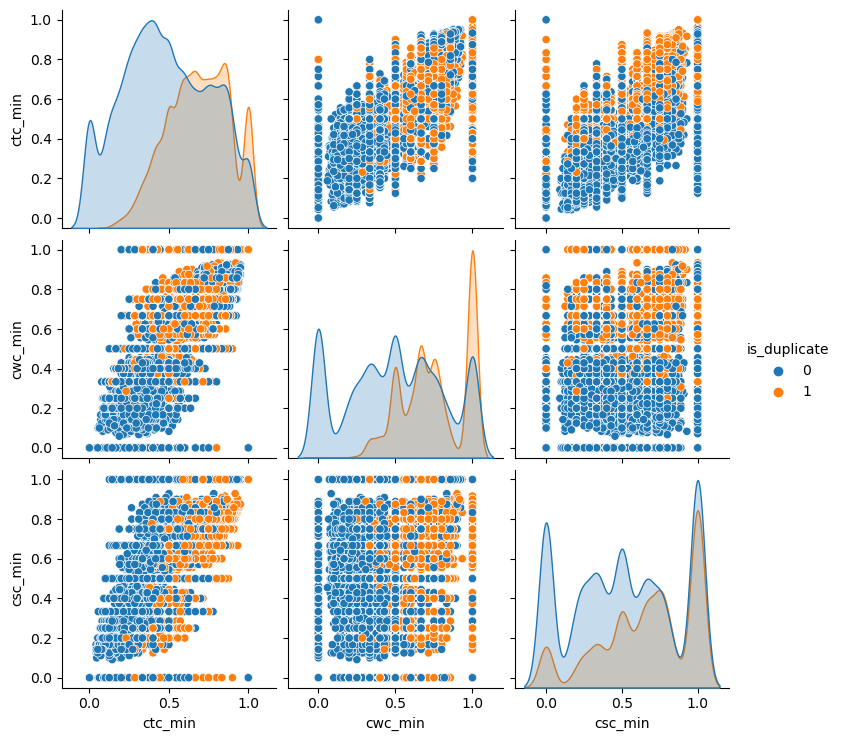

In [103]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

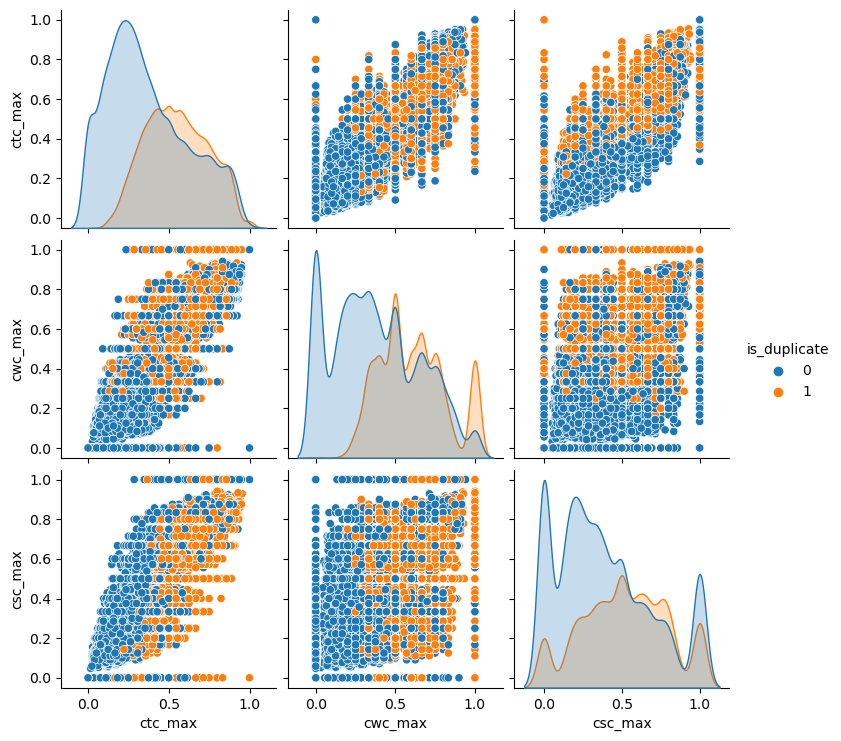

In [104]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

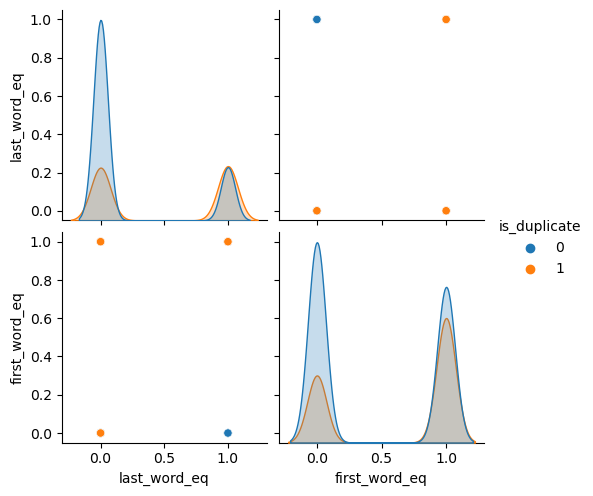

In [105]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

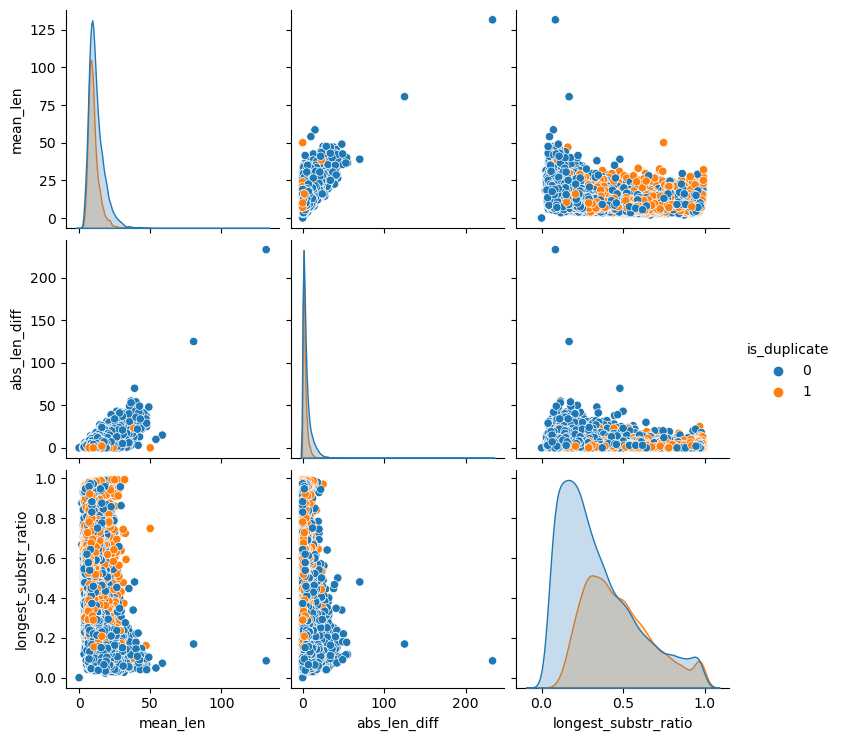

In [106]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

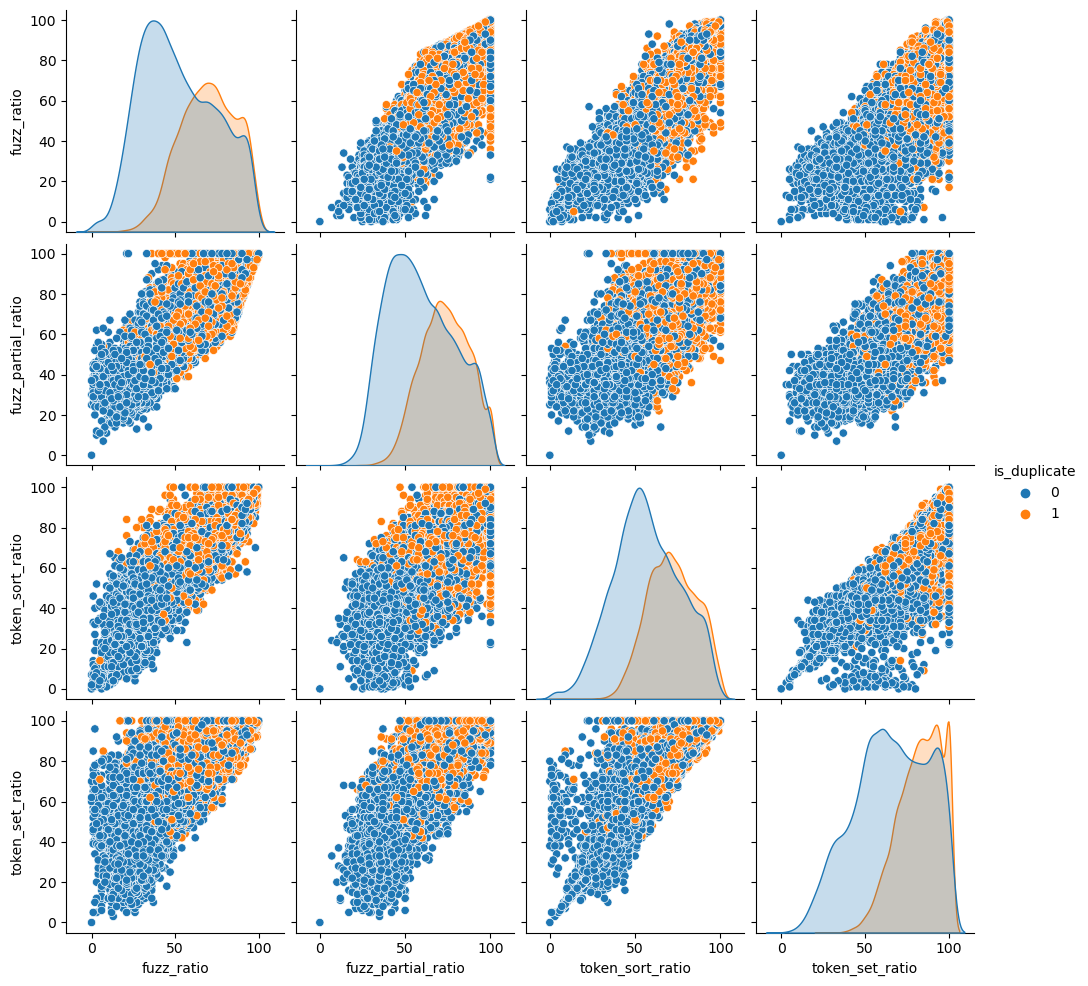

In [107]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [108]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [109]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.356s...
[t-SNE] Computed neighbors for 30000 samples in 12.263s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sa

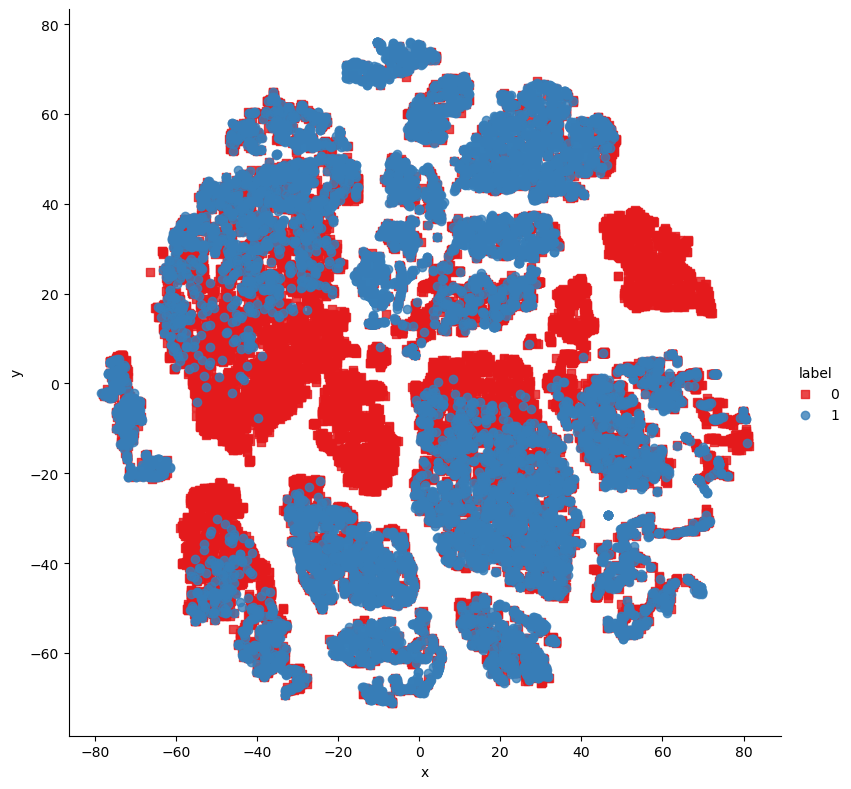

In [110]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])

In [111]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.329s...
[t-SNE] Computed neighbors for 30000 samples in 12.145s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sa

In [112]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [113]:
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  
398782  what is the best marketing automation tool for...  
115086  i am quite poor and i want to be very rich  wh...  
327711  t i e t to thapar university to thapar univers...  
367788  my boyfriend doesnt feel guilty when he hurts ...  
151235  what was the reason behind the bhopal gas tragedy

In [114]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 21)


is_duplicate  q1_len  q2_len  word_common  total_words  word_share  \
398782             1      75      76           12           26        0.46   
115086             0      48      56            8           24        0.33   
327711             0     104     119            4           38        0.11   
367788             0      58     145            1           34        0.03   
151235             0      34      49            3           13        0.23   

         cwc_min   cwc_max   csc_min   csc_max  ...   ctc_max  last_word_eq  \
398782  0.874989  0.874989  0.999980  0.999980  ...  0.923070           1.0   
115086  0.666644  0.499988  0.714276  0.624992  ...  0.466664           1.0   
327711  0.000000  0.000000  0.428565  0.272725  ...  0.115384           0.0   
367788  0.000000  0.000000  0.000000  0.000000  ...  0.000000           0.0   
151235  0.749981  0.599988  0.000000  0.000000  ...  0.333330           1.0   

        first_word_eq  abs_len_diff  mean_len  longest_substr_ratio  \
398782            1.0           0.0      13.0              0.855263   
115086            1.0           3.0      13.5              0.224490   
327711            0.0           6.0      23.0              0.047619   
367788            0.0          17.0      21.5              0.050847   
151235            0.0           4.0       7.0              0.542857   

        fuzz_ratio  fuzz_partial_ratio  token_sort_ratio  token_set_ratio  
398782          99                  99                99               99  
115086          69                  67                65               74  
327711          26                  29                34               43  
367788          29                  41                23               30  
151235          55                  70                48               69  

[5 rows x 21 columns]

In [115]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [116]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [117]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6021)


is_duplicate  q1_len  q2_len  word_common  total_words  word_share  \
398782             1      75      76           12           26        0.46   
115086             0      48      56            8           24        0.33   
327711             0     104     119            4           38        0.11   
367788             0      58     145            1           34        0.03   
151235             0      34      49            3           13        0.23   

         cwc_min   cwc_max   csc_min   csc_max  ...  2990  2991  2992  2993  \
398782  0.874989  0.874989  0.999980  0.999980  ...     0     0     0     0   
115086  0.666644  0.499988  0.714276  0.624992  ...     0     0     0     0   
327711  0.000000  0.000000  0.428565  0.272725  ...     0     0     0     0   
367788  0.000000  0.000000  0.000000  0.000000  ...     0     0     0     1   
151235  0.749981  0.599988  0.000000  0.000000  ...     0     0     0     0   

        2994  2995  2996  2997  2998  2999  
398782     0     0     0     0     0     0  
115086     0     0     0     0     0     0  
327711     0     0     0     0     0     0  
367788     0     0     0     0     0     0  
151235     0     0     0     0     0     0  

[5 rows x 6021 columns]

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7866666666666666

In [120]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.79

In [121]:
from sklearn.metrics import confusion_matrix

In [122]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[3292,  520],
       [ 760, 1428]], dtype=int64)

In [123]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[3250,  562],
       [ 698, 1490]], dtype=int64)

In [124]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [125]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [126]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [127]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [128]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [129]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [130]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [131]:
rf.predict(query_point_creator(q1,q4))

ValueError: X has 6022 features, but RandomForestClassifier is expecting 6020 features as input.

In [ ]:
cv

In [ ]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))